## Cross-set thickness and superelevation analysis
This notebook reproduces analysis for estimating superelevation in [Speed et al., 2024](https://doi.org/10.1130/G52254.1) using measured cross-set thicknesses and channel base elevations. A distribution of dune heights and flow depths is computed from cross-set thickness measurements using empirical relationships of Leclair and Bridge (2001) and Bradley and Venditti (2017). Measurements of T1 and T2 channel thalweg elevations, as measuredwith high precision GPS in the field, are used to compute a distribution of superelevation values for the estimated bankfull flow depths. Cross-set thickness data are available in the project [Github repository](https://github.com/cmspeed/avulsion/), and paths in the notebook assume the user has cloned the repository and retained its original structure.

### Install necessary libraries
Uncomment the next cell if library installation is needed.

In [1]:
### Install necessary libraries
# pip install numpy pandas matplotlib seaborn

### Library imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that text is saved as editable text objects
plt.rcParams['font.size'] = 7 # Set default font size
plt.rcParams['pdf.fonttype'] = 42  # Embed fonts as TrueType
plt.rcParams['ps.fonttype'] = 42   # Embed fonts as TrueType
plt.rcParams['font.family'] = 'Helvetica'

### Read in cross-set thickness and paleocurrent data

In [3]:
## Read in paleocurrent data
data = pd.read_excel('../field_data/measurements/bed_thicknesses_and_xsection_paleocurrents.xlsx', sheet_name='set_thicknesses_&_paleocurrents', skiprows=1)
data.head()

,depth_m,xset_thickness_m,grainsize,paleocurrent,depth_m.1,xset_thickness_m.1,grainsize.1,paleocurrent.1,depth_m.2,xset_thickness_m.2,...,grainsize.6,paleocurrent.7,depth_m.8,xset_thickness_m.8,grainsize.7,paleocurrent.8,depth_m.9,xset_thickness_m.9,grainsize.8,paleocurrent.9
0,0.0,NaN,md,NaN,0.0,NaN,NaN,NaN,0.0,0.4,...,m,NaN,0.0,NaN,m,NaN,0.0,NaN,slt,NaN
1,1.5,NaN,md,NaN,0.8,NaN,NaN,NaN,0.4,0.4,...,obsc,NaN,1.1,NaN,md,NaN,1.0,NaN,ped,NaN
2,2.1,NaN,vfs,NaN,1.4,NaN,NaN,NaN,0.6,NaN,...,slt,NaN,2.0,NaN,vf,NaN,2.2,NaN,slt,NaN
3,2.8,NaN,md,NaN,2.4,NaN,NaN,NaN,1.0,0.6,...,f,NaN,2.8,NaN,md,NaN,4.5,NaN,ped,NaN
4,3.1,NaN,pedc,NaN,2.7,NaN,NaN,NaN,1.6,0.5,...,mL,NaN,4.0,NaN,obs,NaN,5.2,0.2,m,NaN


### Create an array of cross-set thicknesses

In [4]:
thickness_columns = [col for col in data.columns if col.startswith('xset_thickness_m')]
thickness_array = np.array([])
for col in thickness_columns:
    non_nan_values = data[col].dropna().values.astype(float)
    thickness_array = np.concatenate([thickness_array, non_nan_values])
print('total cross-set thickness measurements:', len(thickness_array))

total cross-set thickness measurements: 222


### Compute a distribution of possible dune heights and flow depths
Below, we apply the (1) cross-set thickness to dune height relationship of Leclair and Bridge (2001) and (2) dune height to flow depth relationship in shallow rivers of Bradley and Venditti (2017). This results in a distribution of dune height and flow depths base of the 222 cross-set thickness measurements.

In [5]:
d_vals = []
H_vals = []
for t in thickness_array:
        h_vals = [] 
        h_low = 2.2*t
        h_mean = 2.9*t
        h_high = 3.6*t
        h_vals.extend([h_low,h_mean,h_high])
        H_vals.append(h_vals)
        for h_val in h_vals:
            d_low = 2.8*h_val
            d_mean = 3.5*h_val
            d_high = 9.9*h_val
            d_vals.extend([d_low,d_mean,d_high])
H_vals_array = np.asarray(H_vals).flatten()
d_vals_array = np.asarray(d_vals)

print("---------------------------")
print("DUNE HEIGHT")
print(f"minimum dune height: {np.min(H_vals_array):.2f} m")
print(f"maximum dune height: {np.max(H_vals_array):.2f} m")
print(f"median dune height: {np.median(H_vals_array):.2f} m")
print(f"mean dune height: {np.mean(H_vals_array):.2f}")
print(f"standard deviation of mean dune height: {np.std(H_vals_array):.2f} m")

print("---------------------------")
print("DEPTH")
print(f"minimum depth: {np.min(d_vals_array):.2f} m")
print(f"maximum depth: {np.max(d_vals_array):.2f} m")
print(f"median depth: {np.median(d_vals_array):.2f} m")
print(f"mean depth: {np.mean(d_vals_array):.2f}")
print(f"standard deviation of mean depth: {np.std(d_vals_array):.2f} m")

---------------------------
DUNE HEIGHT
minimum dune height: 0.11 m
maximum dune height: 3.60 m
median dune height: 0.58 m
mean dune height: 0.75
standard deviation of mean dune height: 0.67 m
---------------------------
DEPTH
minimum depth: 0.31 m
maximum depth: 35.64 m
median depth: 2.31 m
mean depth: 4.04
standard deviation of mean depth: 4.85 m


### Compute the 50% and 90% confidence intervals for dune height and channel depth

In [6]:
# Calculate 50% and 90% confidence intervals for dune height
confidence_interval_50_DH = np.percentile(H_vals_array, [25, 75])
confidence_interval_90_DH = np.percentile(H_vals_array, [5, 95])
print('The 50% confidence interval for dune height is:', confidence_interval_50_DH, 'm.')
print('The 90% confidence interval for dune height is:', confidence_interval_90_DH, 'm.')

The 50% confidence interval for dune height is: [0.36 0.87] m.
The 90% confidence interval for dune height is: [0.18 2.2 ] m.


In [7]:
# Calculate 50% and 90% confidence intervals for depth
confidence_interval_50_depth = np.percentile(d_vals_array, [25, 75])
confidence_interval_90_depth = np.percentile(d_vals_array, [5, 95])
print('The 50% confidence interval for depth is:', confidence_interval_50_depth, 'm.')
print('The 90% confidence interval for depth is:', confidence_interval_90_depth, 'm.')

The 50% confidence interval for depth is: [1.26 5.04] m.
The 90% confidence interval for depth is: [ 0.616 12.6  ] m.


### Plot the distribution of dune height and corresponding bankfull depths

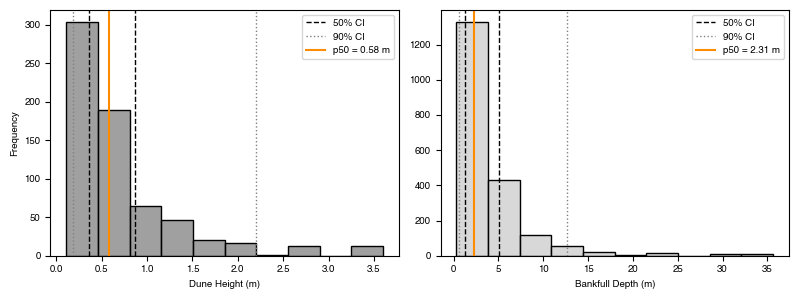

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
sns.histplot(H_vals_array,bins=10, kde=False, color=(0.5, 0.5, 0.5), ax  = ax[0],linewidth=1)
ax[0].axvline(confidence_interval_50_DH[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[0].axvline(confidence_interval_50_DH[1], color='black', linestyle='dashed', linewidth=1)
ax[0].axvline(confidence_interval_90_DH[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[0].axvline(confidence_interval_90_DH[1], color='grey', linestyle='dotted', linewidth=1)
ax[0].axvline(np.percentile(H_vals_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(H_vals_array, 50):.2f} m')
ax[0].set_xlabel('Dune Height (m)')
ax[0].set_ylabel('Frequency')

sns.histplot(d_vals_array, bins=10, color = [0.8, 0.8,0.8], ax = ax[1])
ax[1].axvline(confidence_interval_50_depth[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[1].axvline(confidence_interval_50_depth[1], color='black', linestyle='dashed', linewidth=1)
ax[1].axvline(confidence_interval_90_depth[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[1].axvline(confidence_interval_90_depth[1], color='grey', linestyle='dotted', linewidth=1)
ax[1].axvline(np.percentile(d_vals_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(d_vals_array, 50):.2f} m')
ax[1].set_xlabel('Bankfull Depth (m)')
ax[1].set_ylabel('')

ax[0].legend(fontsize='medium')
ax[1].legend(fontsize='medium')

plt.tight_layout()

## Superelevation analysis

Superelevation ($SE$) is computed using the following equation:
$$SE = \frac{WS_{Elev}}{H} = \frac{\Delta CFC_{Elev} + H - E}{H}$$


where $WS_{Elev}$ is the elevation of the water surface at bankfull flow above the lowest position on the adjacent floodplain, $H$ is bankfull flow depth, $∆CFC_{Elev}$ is the measured elevation offset between T1 and T2 channel-floodplain contacts at the channel thalweg, and $E$ is a magnitude of vertical erosion into the floodplain that occurs during avulsion. We use the distribution of estimated bankful depths ($H$) computed above and measured offset between channel-floodplain contacts ($CFCs$) below the T1 and T2 channel thalwegs.  $CFCs$ were corrected for structural dip of 1.5/006. E was not measured directly; rather, we compute $SE$ for $E$ values from 0 to $H$ to produce a distribution of possible values of $SE$ given the observed CFC configuration.

### Read in channel base measurements
This dataframe contains two elevations of the T1 channel base and one mean elevation of of the floodplain below T2, which we interpret as the T1 floodplain surface.
The elevations in 'measured_m' are the structurally uncorrected values. The values in 'bestfit_m' are the values on the bestfit plane derived from the lidar dataset. 'untilted' are the structurally corrected values

In [9]:
CFC_data = pd.read_csv('../field_data/GPS/CFCs/CFCs_pp_detrended_for_SE.csv')
CFC_data.head()

,CFC,Channel,Longitude,Latitude,X_EPSG2691,Y_EPSG2691,Ellipsoid_H_m,Easting_RMS_m,Northing_RMS_m,Elevation_RMS_m,Lateral_RMS_m,Solution,Samples,Plane_Elev_m,Relief_m
0,1,T1,-110.271720,38.874743,563174.579,4303128.409,1354.317,0.005,0.006,0.012,0.007,FIX,194,1312.302612,42.014388
1,5,T2,-110.272071,38.876857,563142.235,4303362.788,1348.452,0.024,0.013,0.017,0.027,FIX,221,1306.223999,42.228001
2,8,T1,-110.270038,38.876667,563318.813,4303343.114,1349.116,0.008,0.009,0.017,0.013,FIX,222,1306.309326,42.806674
3,9,T1,-110.268990,38.877154,563409.227,4303397.867,1347.553,0.007,0.016,0.016,0.018,FIX,240,1304.674927,42.878073


In [10]:
t1_thalweg_elev = CFC_data[CFC_data['Channel'] == 'T1']['Relief_m']
t2_thalweg_elev = CFC_data[CFC_data['Channel'] == 'T2']['Relief_m']
thalweg_offset = np.mean(t1_thalweg_elev) - np.mean(t2_thalweg_elev)
print(f'T1 thalweg is {thalweg_offset:.2f} m above T2 thalweg.')

T1 thalweg is 0.34 m above T2 thalweg.


In [11]:
SE = []
erosion_values = np.linspace(0, 2.31, num = 10)
for H in d_vals_array:
    for E in erosion_values:
        WSE = thalweg_offset + H - E
        se = WSE/H
        SE.append(se)

SE_array = np.asarray(SE)

In [12]:
# Calculate 50% and 90% confidence intervals for SE 
confidence_interval_SE_50 = np.percentile(SE_array, [25, 75])
confidence_interval_SE_90 = np.percentile(SE_array, [5, 95])

# Format and print the confidence intervals with two decimal places
print(f'median SE is: {np.percentile(SE_array, 50):.2f}')
print(f'50% CI is: [{confidence_interval_SE_50[0]:.2f}, {confidence_interval_SE_50[1]:.2f}]')
print(f'90% CI is: [{confidence_interval_SE_90[0]:.2f}, {confidence_interval_SE_90[1]:.2f}]')

median SE is: 0.76
50% CI is: [0.33, 0.95]
90% CI is: [-0.87, 1.16]


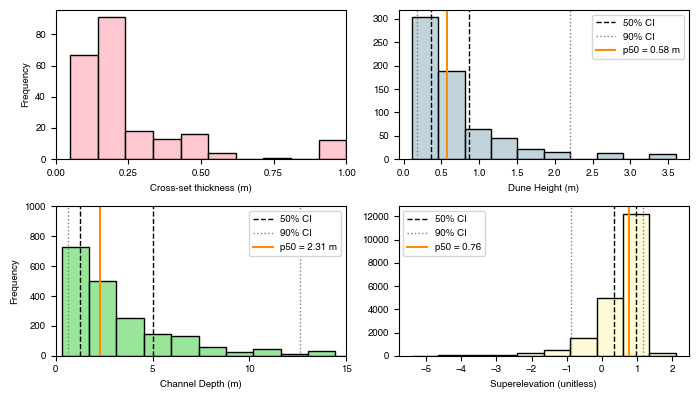

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(7,4))

colors = ['#FFB6C1', '#AEC6CF', '#77DD77', '#FFFACD']

sns.histplot(thickness_array, bins = 10, kde=False,ax= ax[0,0], color = colors[0], linewidth = 1)
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_xlabel('Cross-set thickness (m)')
ax[0,0].set_xlim([0,1])
ax[0,0].set_xticks([0, 0.25, 0.50, 0.75, 1.0])

sns.histplot(H_vals_array,bins = 10, kde=False, color=colors[1], ax  = ax[0,1],linewidth=1)
ax[0,1].axvline(confidence_interval_50_DH[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[0,1].axvline(confidence_interval_50_DH[1], color='black', linestyle='dashed', linewidth=1)
ax[0,1].axvline(confidence_interval_90_DH[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[0,1].axvline(confidence_interval_90_DH[1], color='grey', linestyle='dotted', linewidth=1)
ax[0,1].axvline(np.percentile(H_vals_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(H_vals_array, 50):.2f} m')
ax[0,1].set_xlabel('Dune Height (m)')
ax[0,1].set_ylabel('')

sns.histplot(d_vals_array,bins = 25, kde=False, color=colors[2], ax  = ax[1,0],linewidth=1)
ax[1,0].axvline(confidence_interval_50_depth[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[1,0].axvline(confidence_interval_50_depth[1], color='black', linestyle='dashed', linewidth=1)
ax[1,0].axvline(confidence_interval_90_depth[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[1,0].axvline(confidence_interval_90_depth[1], color='grey', linestyle='dotted', linewidth=1)
ax[1,0].axvline(np.percentile(d_vals_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(d_vals_array, 50):.2f} m')
ax[1,0].set_xlabel('Channel Depth (m)')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_ylim([0,1000])
ax[1,0].set_xlim([0,15])
ax[1,0].set_xticks([0, 5, 10, 15])

sns.histplot(SE_array, bins=10, color=colors[3], ax = ax[1,1])
ax[1,1].axvline(confidence_interval_SE_50[0], color='black', linestyle='dashed', linewidth=1, label='50% CI')
ax[1,1].axvline(confidence_interval_SE_50[1], color='black', linestyle='dashed', linewidth=1)
ax[1,1].axvline(confidence_interval_SE_90[0], color='grey', linestyle='dotted', linewidth=1, label='90% CI')
ax[1,1].axvline(confidence_interval_SE_90[1], color='grey', linestyle='dotted', linewidth=1)
ax[1,1].axvline(np.percentile(SE_array, 50), color='darkorange', linestyle='solid', label=f'p50 = {np.percentile(SE_array, 50):.2f}')
#ax[1,1].set_ylim([0,1000])

ax[1,1].set_xlabel('Superelevation (unitless)')
ax[1,1].set_ylabel('')

ax[0,1].legend(fontsize='medium', loc='upper right')
ax[1,0].legend(fontsize='medium', loc='upper right')
ax[1,1].legend(fontsize='medium', loc='upper left')

plt.tight_layout()